In [13]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
from sklearn import linear_model
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices',con=engine)
engine.dispose()
house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
house_df

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [5]:
house_corr = pd.DataFrame(house_df.corr())
house_corr['saleprice']

id              -0.021917
mssubclass      -0.084284
lotfrontage      0.351799
lotarea          0.263843
overallqual      0.790982
overallcond     -0.077856
yearbuilt        0.522897
yearremodadd     0.507101
masvnrarea       0.477493
bsmtfinsf1       0.386420
bsmtfinsf2      -0.011378
bsmtunfsf        0.214479
totalbsmtsf      0.613581
firstflrsf       0.605852
secondflrsf      0.319334
lowqualfinsf    -0.025606
grlivarea        0.708624
bsmtfullbath     0.227122
bsmthalfbath    -0.016844
fullbath         0.560664
halfbath         0.284108
bedroomabvgr     0.168213
kitchenabvgr    -0.135907
totrmsabvgrd     0.533723
fireplaces       0.466929
garageyrblt      0.486362
garagecars       0.640409
garagearea       0.623431
wooddecksf       0.324413
openporchsf      0.315856
enclosedporch   -0.128578
threessnporch    0.044584
screenporch      0.111447
poolarea         0.092404
miscval         -0.021190
mosold           0.046432
yrsold          -0.028923
saleprice        1.000000
Name: salepr

In [6]:
testing_col = 'garagecars'

In [7]:
house_corr[testing_col]

id               0.016570
mssubclass      -0.040110
lotfrontage      0.285691
lotarea          0.154871
overallqual      0.600671
overallcond     -0.185758
yearbuilt        0.537850
yearremodadd     0.420622
masvnrarea       0.364204
bsmtfinsf1       0.224054
bsmtfinsf2      -0.038264
bsmtunfsf        0.214175
totalbsmtsf      0.434585
firstflrsf       0.439317
secondflrsf      0.183926
lowqualfinsf    -0.094480
grlivarea        0.467247
bsmtfullbath     0.131881
bsmthalfbath    -0.020891
fullbath         0.469672
halfbath         0.219178
bedroomabvgr     0.086106
kitchenabvgr    -0.050634
totrmsabvgrd     0.362289
fireplaces       0.300789
garageyrblt      0.588920
garagecars       1.000000
garagearea       0.882475
wooddecksf       0.226342
openporchsf      0.213569
enclosedporch   -0.151434
threessnporch    0.035765
screenporch      0.050494
poolarea         0.020934
miscval         -0.043080
mosold           0.040522
yrsold          -0.039117
saleprice        0.640409
Name: garage

In [8]:
100*house_df[testing_col].isnull().sum()/house_df[testing_col].isnull().count()

0.0

In [9]:
Y = house_df['saleprice']
X = house_df[['lotarea', 'overallqual', 'grlivarea', 'totalbsmtsf', 'firstflrsf', 'garagecars']]
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     794.2
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        22:25:52   Log-Likelihood:                -17483.
No. Observations:                1460   AIC:                         3.498e+04
Df Residuals:                    1453   BIC:                         3.502e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.054e+05   4873.797    -21.617      0.000   -1.15e+05   -9.58e+04
lotarea         0.5859      0.108      5.448      0.000       0.375       0.797
overallqual  2.474e+04   1082.538     22.852      0.000    2.26e+04    2.69e+04
grlivarea      40.9462      2.687     15.240      0.000      35.676      46.216
totalbsmtsf    23.3565      4.268      5.472      0.000      14.984      31.729
firstflrsf      9.4828      4.991      1.900      0.058      -0.308      19.274
garagecars    1.78e+04   1737.357     10.246      0.000    1.44e+04    2.12e+04
==============================================================================
Omnibus:                      443.596   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43373.918
Skew:                          -0.342   Prob(JB):                         0.00
Kurtosis:                      29.693   Cond. No.                     7.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
lrm = linear_model.LinearRegression()
X = house_df[['lotarea', 'overallqual', 'grlivarea', 'totalbsmtsf', 'firstflrsf', 'garagecars']]
lrm.fit(X, Y)
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [5.85948307e-01 2.47378629e+04 4.09461996e+01 2.33565093e+01
 9.48277134e+00 1.78004582e+04]

Intercept: 
 -105356.00922799887


In [11]:
predictions = lrm.predict(X)
errors = Y - predictions

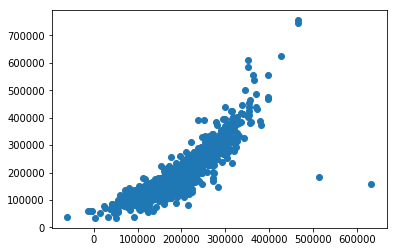

In [14]:
plt.scatter(x = predictions, y = Y)
plt.show()

In [15]:
print(np.mean(errors))

-1.7860980883036575e-11


In [16]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 486.668 and p value is 7.57e-108
Levene test statistic value is 463.934 and p value is 1.28e-95


In [18]:
house_df[['lotarea', 'overallqual', 'grlivarea', 'totalbsmtsf', 'firstflrsf', 'garagecars']].corr()

,lotarea,overallqual,grlivarea,totalbsmtsf,firstflrsf,garagecars
lotarea,1.000000,0.105806,0.263116,0.260833,0.299475,0.154871
overallqual,0.105806,1.000000,0.593007,0.537808,0.476224,0.600671
grlivarea,0.263116,0.593007,1.000000,0.454868,0.566024,0.467247
totalbsmtsf,0.260833,0.537808,0.454868,1.000000,0.819530,0.434585
firstflrsf,0.299475,0.476224,0.566024,0.819530,1.000000,0.439317
garagecars,0.154871,0.600671,0.467247,0.434585,0.439317,1.000000


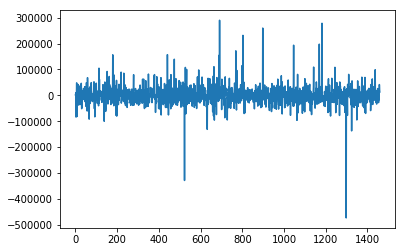

In [19]:
plt.plot(errors)
plt.show()

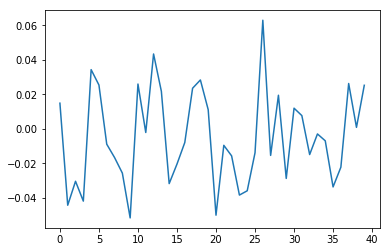

In [20]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

In [21]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 43373.917618270774 and p value is 0.0
Normality test statistics is 443.59644948181995 and p value is 4.723401890548484e-97
